Format reference: https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial7/GNN_overview.html

# Generative Adversarial Network (GAN)

## Motivation


* To train some trading strategy based on historical time series, one path is not enough. However, there is only "one" historical (price) path. We need to capture the features of the path and "generate" more synthetic while robust paths to yield a reliable strategy. Note that we must ensure these synthetic paths and the only real path look alike, which means they have similar distributional properties.
* Traditional models focus merely on the distribution of returns, but this viewpoint may not provide a complete picture because the financial world has high-densional distributions. Traditional modelling may be unable to capture such complex distributions. In particular, such a model usually assumes a stationary distribution of the data streams, which is often not the case. Also, the tail events (financial crash) are hard to be modelled.
* Therefore, we turn to **generative adversial networks (GAN)** to capture these high dimensional probability measures.
* Furthermore, we integrate GAN with **signatures**, which extract path feaures to provide a universal description for itself.

# Intro to Generative Adversarial Network

A Generative Adversarial Network (GAN) is an artificial neural network architecture used in machine learning and deep learning for generating new data that is similar to existing data. GANs were introduced by Ian Goodfellow and his colleagues in 2014 and have since become a powerful tool in various applications, including image generation, style transfer, super-resolution, and more.

We can summarize Generative Adversarial Networks into 5 components, which are the (1) generator, (2) discriminator, (3) adversial process, (4) loss function, and (5) training process.

**1. Generator**

* The generator is one of the two main components of a GAN.
* It takes random inputs from some distribution $Z$ (often standard normal), generates new/fake data samples by mapping $Z$ to $Y$, where $Y$ is the space of real data. For example, in image generation, the generator takes random noise as input and produces images.
* The generator starts with distributional random noise ( $Z$ ) and gradually learns to generate data that becomes increasingly similar to the real data ( $Y$ ) it's trained on.

**2. Discriminator**

* The discriminator is the second main component of a GAN.
* It evaluates and classifies whether data is "real" (belonging to the actual dataset) or "fake" (generated by the generator).
* The discriminator is trained to improve its ability to distinguish between real and generated data.

**3. Adversarial Process**

* From 1. and 2., it can be noticed that the generator tries to let fake data imitate how real data look, while the discriminator tries to differentiate fake and real data. There is an "adversarial" relationship between the two, hence the name "Generative Adversarial Network."
* This adversarial process leads to a competition where both the generator and discriminator improve over time.

**4. Loss Functions**

* GANs use two loss functions: one for the generator and one for the discriminator.
* The generator's loss encourages it to generate data that fools the discriminator (i.e., the generator wants the discriminator to classify its output as real).
* The discriminator's loss encourages it to correctly classify real and fake data.

**5. Training Process**

* During training, the generator and discriminator are updated one after another.
* The generator produces fake data, which is mixed with real data, and the discriminator is trained on this combined dataset.
* The generator then uses the feedback from the discriminator to improve its output.
* This process continues until the generator creates data that is virtually indistinguishable from real data.

Reference to be read: https://hackmd.io/@shaoeChen/SyjI6W2zB/https%3A%2F%2Fhackmd.io%2F%40shaoeChen%2FH1pT3o2Br

# Intro to **Signature Transform** of Paths in Mathematics

The **signature transform** is a mathematical technique used to extract information from paths or sequences of data. It is particularly useful in the field of rough path theory, which has applications in various areas, including stochastic analysis, machine learning, and finance.

The signature transform is based on the concept of *iterated integrals of a path or sequence*. Here's a brief overview of how it works:

1. **Input some Paths or Sequences**: Consider a path or sequence of data points, often represented as a continuous curve or a discrete sequence of values.

2. **Compute Iterated Integrals**: The signature transform involves computing iterated integrals of the path. The integrals go from a simple integration, double integration, triple integration, all the way up to infintely-many-times iterated integration. These integrals capture information about the path's curvature and the relationships between different parts of the path.

3. **Organize the Integrals into a Tensor Structure**: The computed iterated integrals are organized into a tensor-like structure, where each component of the tensor corresponds to a particular level of integration. The order of integration determines the rank of the tensor.

4. **Features Extraction**: The resulting tensor structure, known as the path signature, contains information about the original path's shape, direction, and higher-order properties. It can be used as a feature vector for further analysis or classification tasks.

The signature transform is valuable in applications involving sequential data, such as time series analysis or handwriting recognition. By encoding the path's information into a structured tensor, it allows for effective and efficient analysis while maintaining information about the entire path, including higher-order interactions between data points.

Let us formulate the signature of a path mathematically.

Given a continuous $d$-dimensional path $X : [a,b] \to \mathbb{R}^d$ with $X(t) =: X_t = (X^1_t, \ldots, X^d_t )$, the *signature* is denoted by $S(X)_{a,b} \in T(\mathbb{R}^d)$, where $T(\mathbb{R}^d)$ is the tensor algebra space.

$$ S(X)_{a,b} := ( 1, S(X)^{1}_{a,b}, \cdots, S(X)^{d}_{a,b},  S(X)^{1,1}_{a,b}, \cdots,  S(X)^{d,d}_{a,b},  S(X)^{1,1,1}_{a,b}, \cdots ) $$

where, for $I=(i_1,\cdots,i_n)$ with $i_k$, $i_l$ not necessarily distinct and size $|I|$ not bounded above,

$$ S(X)^{I}_{a,b} = \underset{\substack{ a < u_1 < u_2 < \ldots < u_n < b }}{\int\ldots\int} d X_{u_1}^{i_1} \cdots d X_{u_n}^{i_n} $$

There are $d$ first order signatures. Each component is the change in the $i$-th dimensional of the path:
$$ S(X)^{i}_{a,b} = \underset{\substack{ a < u < b }}{\int} d X_{u}^{i} = X_{b}^{i} - X_{a}^{i} $$

There are $d^2$ second order signatures. The second order signatures look like:
$$ S(X)^{i_1,i_2}_{a,b} = \underset{\substack{ a < u_1 < u_2 < b }}{\int \int} d X_{u_1}^{i_1} d X_{u_2}^{i_2} = \underset{\substack{ a < u_2 < b }}{\int} S(X)^{i_1}_{a,u_2} d X_{u_2}^{i_2} $$

Continue inductively, we would have $d^k$ many signatures of order $k$, and they would be:
$$ S(X)^{i_1, \ldots, i_k}_{a, b} := \int_a^b S(X)^{i_1, \ldots, i_{k-1}}_{a, u_k } \, dX^{i_k}_{u_k} $$

Notice that for order-$k$ with $k \ge 2$, the signatures are effectively integrating the area under the curves of the order-$(k-1)$ signature, $S(X)^{i_1, \ldots, i_{k-1}}_{a, u_k}$.

Below is a numerical implementation of the signature method on a path. I used computed signatures of 5 linear paths in help understand how different paths affect the signatures.

The paths are:
1. $X_t = (t,2t)$
2. $X_t = (t,t)$
3. $X_t = (t,0)$
4. $X_t = (t,-t)$
5. $X_t = (t,-2t)$

The function `compute_signature()` computes the signature of paths by using the iterative formula $ S(X)^{i_1, \ldots, i_k}_{a, b} := \int_a^b S(X)^{i_1, \ldots, i_{k-1}}_{a, u_k } \, dX^{i_k}_{u_k} $ from above.

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import itertools

In [99]:
def compute_signature(path_nd: np.ndarray, turncate_order: int = 3):

    permutation_elements = [i for i in range(0, path_nd.shape[-1])]
    path_nd_diff = np.diff(path_nd, axis=0)

    signatures_up_to_order_k = []
    previous_permutation_list = None

    for k in range(1, turncate_order+1):
        order_k_signatures = [ ]
        permutation_list = list(itertools.product(permutation_elements, repeat=k))

        for indices in permutation_list:
            # print(f"order {k} index {indices}")
            if k == 1:
                signature_up_to_u = np.cumsum( path_nd_diff[...,indices], axis=0 )
                # print(signature_up_to_u)
            elif k >= 2:
                # continue
                prev_indices = previous_permutation_list.index( indices[:-1] )
                prev_signature = signatures_up_to_order_k[k-2][prev_indices]
                # print( prev_signature )
                # print( path_nd_diff[ ... , indices[-1] ] )
                tensor_prod = np.multiply( prev_signature, path_nd_diff[ ... , indices[-1] ].reshape( path_nd_diff.shape[0], -1) )
                # print( tensor_prod )
                signature_up_to_u = np.cumsum( tensor_prod, axis=0 )
                # print( signature_up_to_u )

            order_k_signatures.append( signature_up_to_u )

        signatures_up_to_order_k.append( order_k_signatures )
        previous_permutation_list = permutation_list

    return signatures_up_to_order_k

In [116]:
# signature_2d = compute_signature( path_2d, turncate_order=3 )
# signature_3d = compute_signature( path_3d, turncate_order=3 )

Lastly, plot the signatures as below:

In [123]:
def plot_paths_and_signatures(paths, signatures, order,
        path_lim: tuple = (-2,2), sig_lim: tuple = (-2,2)
    ):
    last_signatures = []
    tick_labels = []
    for i in range( len(paths) ):
        last_signature = []
        tick_label = []

        for k in range(1,order+1):
            permutation_elements = [i for i in range(paths[i].shape[-1])]
            permutation_list = list(itertools.product(permutation_elements, repeat=k))
            for l, sig in enumerate(signatures[i][k-1]):
                # print(permutation_list[l], sig[-1])
                last_signature.append( sig[-1][0] )  # get value at the last time index
                tick_label.append( permutation_list[l] )
        
        last_signatures.append( last_signature )
        tick_labels.append( tick_label )

    num_paths = len(paths)
    num_characteristics = len(tick_labels)

    # Create a figure with subplots
    each_height = 2**order*0.5
    fig, axes = plt.subplots(num_paths, 2, figsize=(12, num_paths*each_height), gridspec_kw={'width_ratios': [3, 2]})

    min_value = -2
    max_value = 2
    norm = plt.Normalize(min_value, max_value)
    cmap = cm.get_cmap('viridis')

    for i, path in enumerate(paths):
        # Plot the paths in the left column
        axes[i, 0].set_ylim( path_lim )
        axes[i, 0].plot(path[:,0], path[:,1], label=f'Path {i+1}')
        axes[i, 0].set_xlabel(f'Path {i+1} : $x$')
        axes[i, 0].set_ylabel(f'Path {i+1} : $y$')
        axes[i, 0].grid(True)

        # Plot the Signatures in the right column
        axes[i, 1].set_xlim( sig_lim )
        axes[i, 1].barh( [str(x) for x in tick_labels[i]], last_signatures[i], color=cmap(norm(last_signatures[i])))
        axes[i, 1].set_xlabel('Signature Value')
        axes[i, 1].grid(True)


    # Adjust spacing between subplots for better readability
    plt.tight_layout()

    # Show the plot
    plt.show()

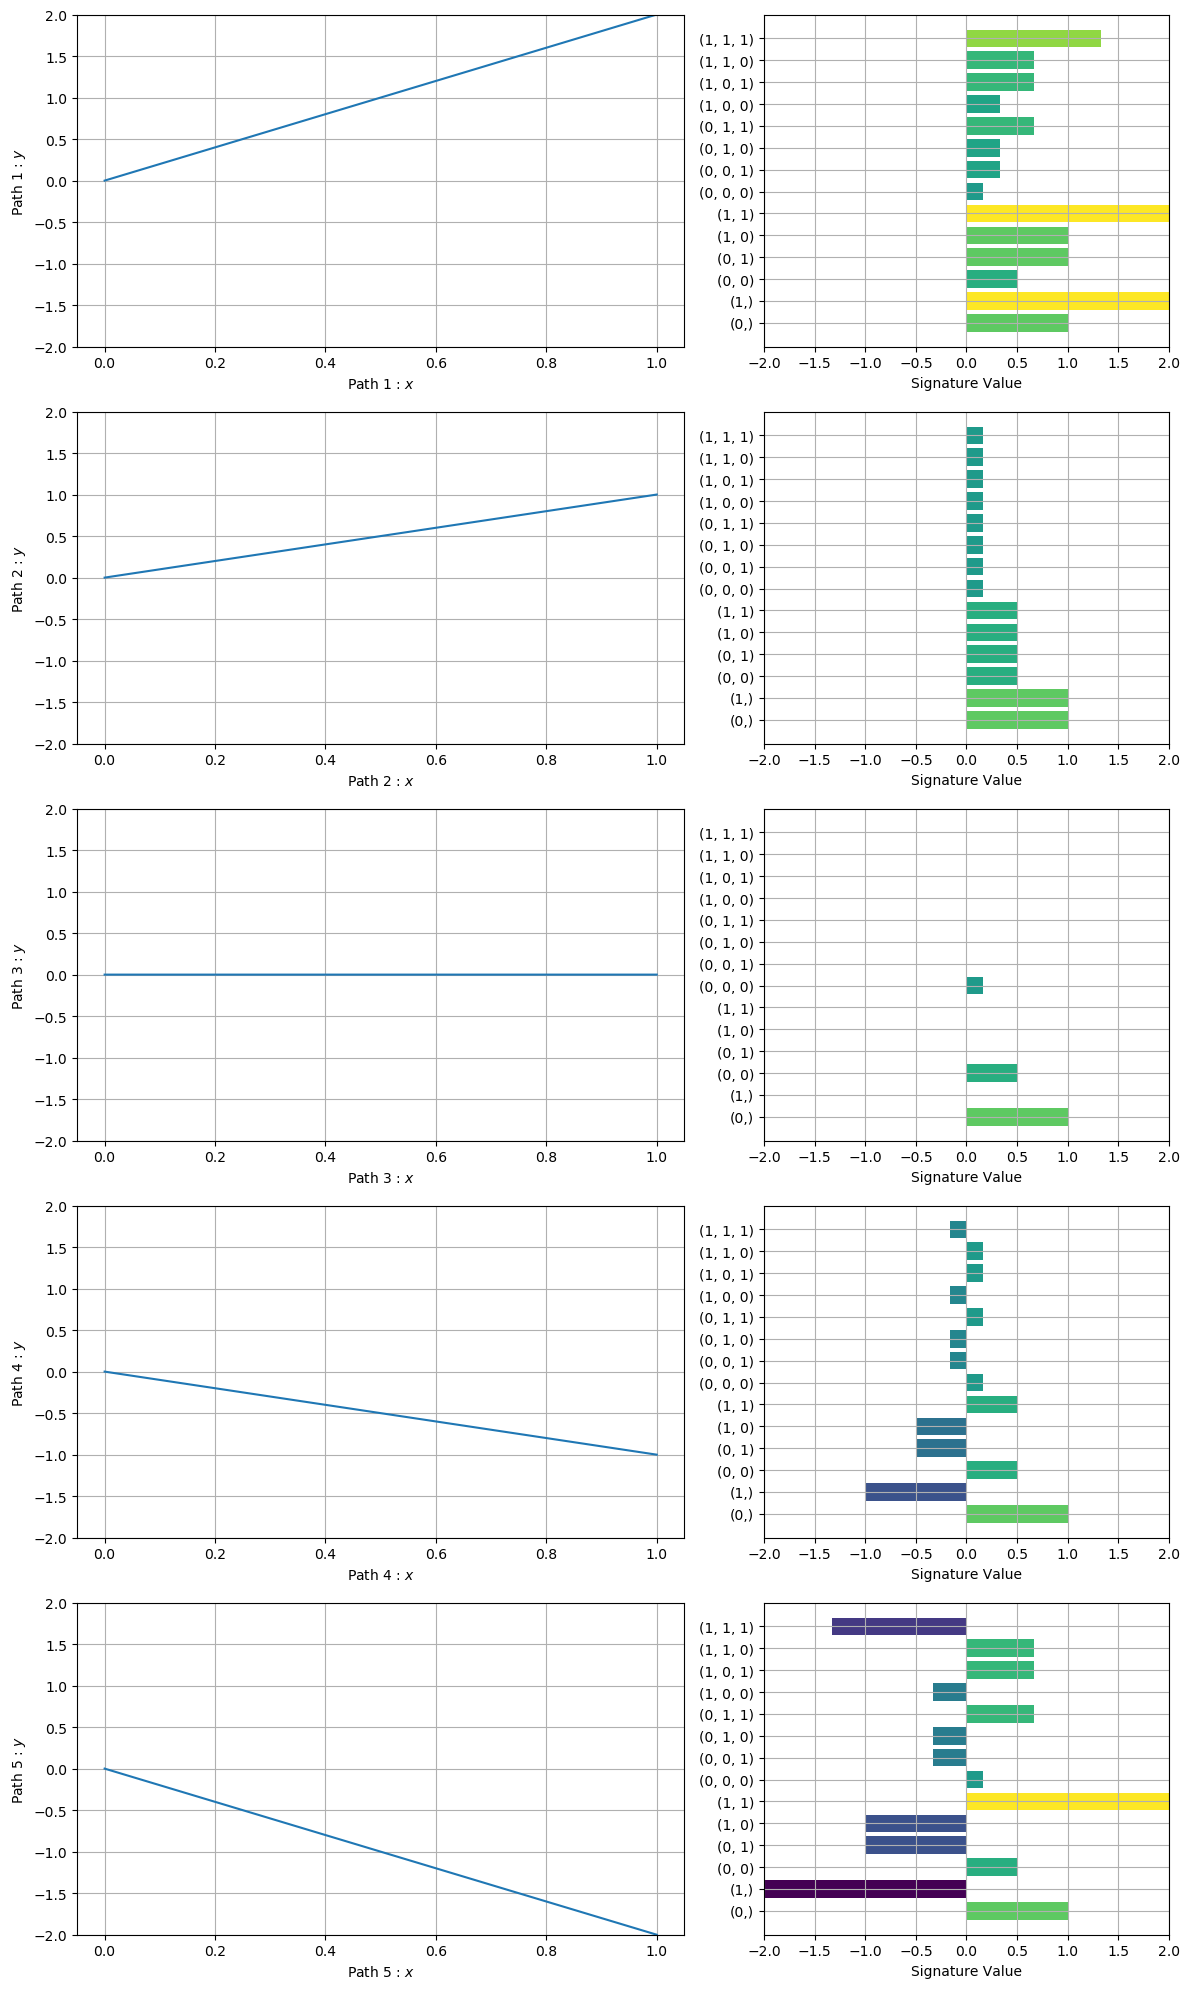

In [125]:
a, b, steps = 0, 1, 10**4+1
t = np.linspace(a, b, steps)

def path_linear_function(t, intercept, slope):
    # return t, t**2 
    return t, intercept + slope*t

path_2d_1 = np.array([path_linear_function(ti, 0,  2) for ti in t])
path_2d_2 = np.array([path_linear_function(ti, 0,  1) for ti in t])
path_2d_3 = np.array([path_linear_function(ti, 0,  0) for ti in t])
path_2d_4 = np.array([path_linear_function(ti, 0, -1) for ti in t])
path_2d_5 = np.array([path_linear_function(ti, 0, -2) for ti in t])

order = 3

s1 = compute_signature( path_2d_1, turncate_order=order )
s2 = compute_signature( path_2d_2, turncate_order=order )
s3 = compute_signature( path_2d_3, turncate_order=order )
s4 = compute_signature( path_2d_4, turncate_order=order )
s5 = compute_signature( path_2d_5, turncate_order=order )

paths = [path_2d_1, path_2d_2, path_2d_3, path_2d_4, path_2d_5]
signatures = [s1,s2,s3,s4,s5]

plot_paths_and_signatures(paths, signatures, order)

The graph on the left column plots the path itself. The righter column shows the values of the signatures, with the indices $(i_1,\cdots,i_k)$ of $S(X)^{i_1, \ldots, i_k}_{a, b}$ on the vertice axes. Notice that the signatures reflects the slope of the path.

Try additional paths and truncate their signatures to order $4$:
1. $X_t = (t,t^2)$
2. $X_t = (t,10t^2)$
3. $X_t = (t,10(t-0.5)^2)$
4. $X_t = (t,10(t-0.5)^2 - 1)$

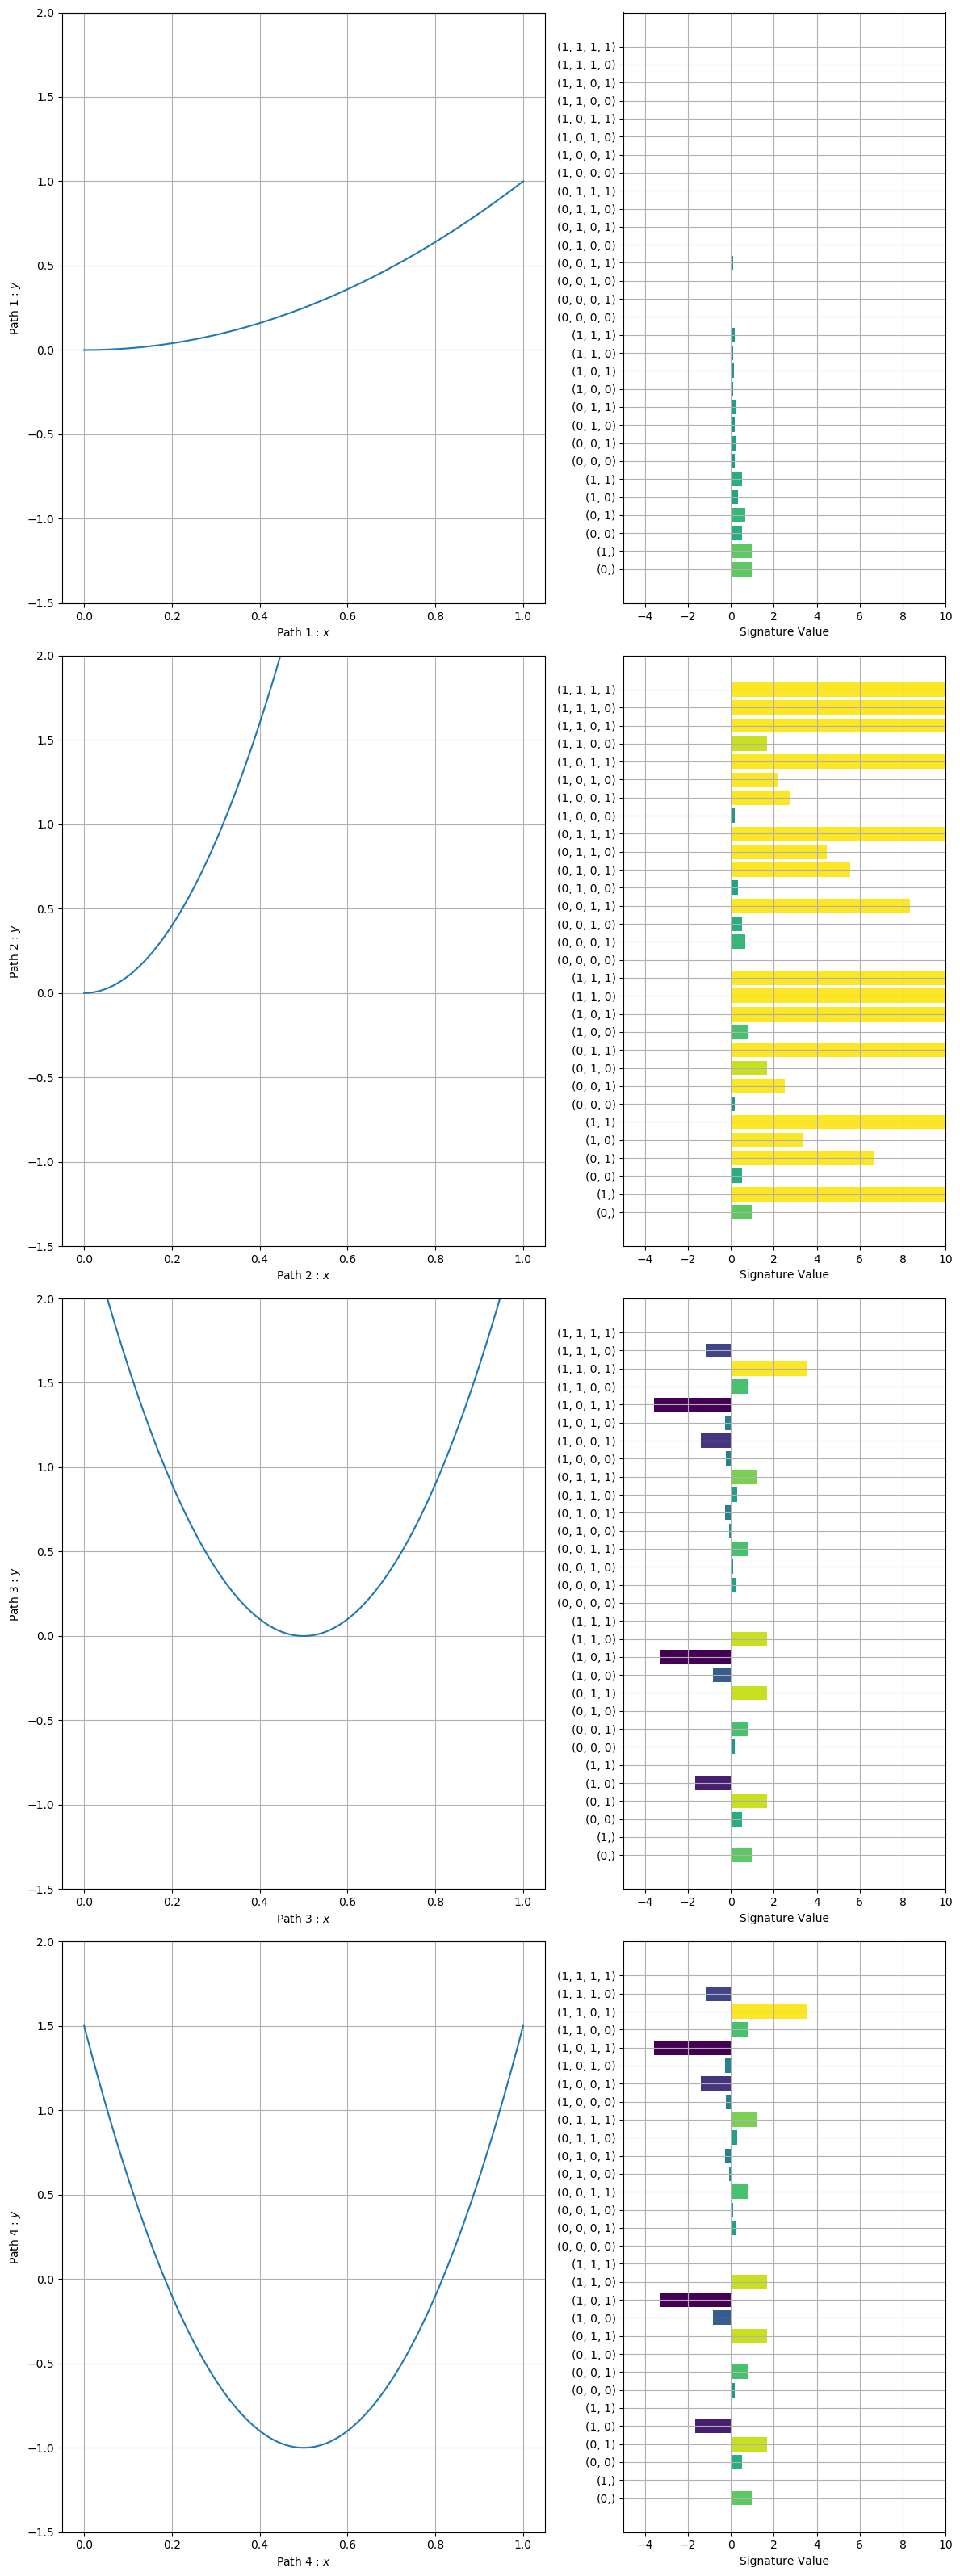

In [131]:
def path_pow_2(t, scalar, shift, const):
    return t, scalar*( t - shift )**2 +  const

def path_pow_3(t, scalar, shift, const):
    return t, scalar*( t - shift )**3 + const

p21 = np.array([path_pow_2(ti,  1,   0,  0) for ti in t])
p22 = np.array([path_pow_2(ti, 10,   0,  0) for ti in t])
p23 = np.array([path_pow_2(ti, 10, 0.5,  0) for ti in t])
p24 = np.array([path_pow_2(ti, 10, 0.5, -1) for ti in t])

order = 4

s21 = compute_signature( p21, turncate_order=order )
s22 = compute_signature( p22, turncate_order=order )
s23 = compute_signature( p23, turncate_order=order )
s24 = compute_signature( p24, turncate_order=order )

paths = [p21,p22,p23,p24]
signatures = [s21,s22,s23,s24]

plot_paths_and_signatures(paths, signatures, order, path_lim=(-1.5,2), sig_lim=(-5,10))

To be read: 
* https://github.com/pafoster/path_signatures_introduction/tree/master
* https://www.quantstart.com/articles/rough-path-theory-and-signatures-applied-to-quantitative-finance-part-1/

# train.py, the main function of this project

In [2]:
import itertools
import os
from os import path as pt

import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn.model_selection import train_test_split

from hyperparameters import SIGCWGAN_CONFIGS
from lib import ALGOS
from lib.algos.base import BaseConfig
from lib.data import get_data
from lib.plot import savefig, create_summary
from lib.utils import pickle_it

from train import *

from torch import nn
from typing import Tuple

Below is the core of `train.py`. Comments are made between the code to explain what each section does.

The main parts are:

1. `get_data()`
2. `algo.fit()`
3. Plot & Summarize

In [4]:
def run(algo_id, base_config, base_dir, dataset, spec, data_params={}):
    """ Create the experiment directory, calibrate algorithm, store relevant parameters. """
    print('Executing: %s, %s, %s' % (algo_id, dataset, spec))
    experiment_directory = pt.join(base_dir, dataset, spec, 'seed={}'.format(base_config.seed), algo_id)
    if not pt.exists(experiment_directory):
        # if the experiment directory does not exist we create the directory <<<<
        os.makedirs(experiment_directory)
    
    # >>>> Set seed for exact reproducibility of the experiments <<<<
    set_seed(base_config.seed)
    
    # >>>> initialise dataset and algo <<<<
    x_real = get_data(dataset, base_config.p, base_config.q, **data_params)
    x_real = x_real.to(base_config.device)

    # train test split
    # test set is used to compare with data generated by the generator trained by training set.
    size_train = int(x_real.shape[0] * 0.8)
    indices = np.random.permutation(x_real.shape[0])
    train_idx, test_idx = indices[:size_train], indices[size_train:]
    x_real_train, x_real_test = x_real[train_idx], x_real[test_idx]

    algo = get_algo(algo_id, base_config, dataset, data_params, x_real_train)

    # >>>> Train the algorithm <<<<
    algo.fit()

    # >>> Traing Ends Here <<<

    # >>>> create summary <<<<
    create_summary(dataset, base_config.device, algo.G, base_config.p, base_config.q, x_real_test, experiment_directory)
    savefig('summary.png', experiment_directory)

    # >>>> Save generator weights, real path and hyperparameters. <<<<
    # >>>> Also, graph the paths to see how different they are. <<<<
    pickle_it(x_real, pt.join(pt.dirname(experiment_directory), 'x_real.torch'))
    random_indices = torch.randint(0, x_real.shape[0], (250,))
    for asset_i in range(x_real.shape[2]):
        plt.plot( torch.transpose(x_real[random_indices, base_config.p:, asset_i], 0, 1) , 'C%s' % asset_i, alpha=0.1)
    plt.ylim( (-0.2,0.2) )
    plt.savefig(os.path.join(experiment_directory, 'x_real.png'))
    plt.clf()

    pickle_it(x_real_test, pt.join(pt.dirname(experiment_directory), 'x_real_test.torch'))
    random_indices = torch.randint(0, x_real_test.shape[0], (250,))
    for asset_i in range(x_real_test.shape[2]):
        plt.plot( torch.transpose( x_real_test[random_indices, base_config.p:, asset_i], 0, 1) , 'C%s' % asset_i, alpha=0.1)
    plt.ylim( (-0.2,0.2) )
    plt.savefig(os.path.join(experiment_directory, 'x_real_test.png'))
    plt.clf()
    
    pickle_it(x_real_train, pt.join(pt.dirname(experiment_directory), 'x_real_train.torch'))
    random_indices = torch.randint(0, x_real_train.shape[0], (250,))
    for asset_i in range(x_real_train.shape[2]):
        plt.plot( torch.transpose( x_real_train[random_indices, base_config.p:, asset_i], 0, 1) , 'C%s' % asset_i, alpha=0.1)
    plt.ylim( (-0.2,0.2) )
    plt.savefig(os.path.join(experiment_directory, 'x_real_train.png'))
    plt.clf()

    pickle_it(algo.training_loss, pt.join(experiment_directory, 'training_loss.pkl'))
    pickle_it(algo.G.to('cpu').state_dict(), pt.join(experiment_directory, 'G_weights.torch'))
    
    # >>>> Log some results <<<<
    algo.plot_losses()
    savefig('losses', experiment_directory)


def main(args):
    if not pt.exists('./data'):
        os.mkdir('./data')

    print('Start of training. CUDA: %s' % args.use_cuda)
    for dataset in args.datasets:
        for algo_id in args.algos:
            for seed in range(args.initial_seed, args.initial_seed + args.num_seeds):
                
                print(f"dataset={dataset} / algo={algo_id} / seed={seed}")
                
                base_config = BaseConfig(
                        device='cuda:{}'.format(args.device) if args.use_cuda and torch.cuda.is_available() else 'cpu',
                    seed=seed,
                    batch_size=args.batch_size,
                    hidden_dims=args.hidden_dims,
                    p=args.p,
                    q=args.q,
                    total_steps=args.total_steps,
                    mc_samples=1000,
                )
                set_seed(seed)
                generator = get_dataset_configuration(dataset)
                for spec, data_params in generator:
                    run(
                        algo_id=algo_id,
                        base_config=base_config,
                        data_params=data_params,
                        dataset=dataset,
                        base_dir=args.base_dir,
                        spec=spec,
                    )

**To start training, run the block below**

In [ ]:
import argparse
class Args(argparse.Namespace):
    base_dir     = './numerical_results'
    use_cuda     = 'store_true'
    device       = 0
    num_seeds    = 1
    initial_seed = 0
    datasets     = ['BINANCE', ]
    algos        = ['CWGAN','SigCWGAN',]
    batch_size   = 200
    p            = 24
    q            = 6
    hidden_dims  = 3 * (50,)
    total_steps  = 100

args = Args()
main(args)


# Notations

* $N$ is the total number of closing prices for each asset.
* $d$ is the number of total assets.
* $p$ is the length of past data that we are conditioning on.
* $q$ is the length of generated data.

# [1] `get_data()`

First, call `get_binance_dataset()` which reads the csv of each Binance asset and concatenates all of their closing prices into a 3D-tensor whose size is $(1,N,d)$. Here, $N$ is the total number of closing prices for each asset and $d$ is the number of total assets.

Then, the $(1,N,d)$ tensor is thrown into `zero_based_rolling_window()`. The output is a $( \, N-(p+q) \, , \, p+q \, , \, d \, )$ 3D-tensor, where $p$ is the length of past data that we are conditioning on and $q$ is the length of generated data. This is done by following this procedure:

1. Call each entry of the second dimension of the $(1,N,d)$ tensor $x_t$, so $t=0,1,\ldots,N-1$.
2. For $t=0$ to $N-(p+q)$ (the start of each windonw)
    1. First take the next $p+q$ $x_t$'s, which are $x_t,\ldots,x_{t+(p+q-1)}$.
    2. Compute $y_{s} := \dfrac{ (x_s-x_t) }{ x_t }$ for $s=t,t+1,\ldots,t+(p+q-1)$, which is the relative change of price to the price at the start of the window.
    3. Collect $y_t,y_{t+1},\ldots,y_{t+(p+q-1)}$ to form a $(1,p+q,d)$ tensor.
3. Collect all $(1,p+q,d)$ tensors to form a $(N-(p+q),p+q,d)$ tensor. Return this tensor.

# [2] `algo.fit()`

The `fit()` function is defined by the `BaseAlgo` class. When the `fit()` function is called, we enter a training loop whose number of iterations is determined by `base_config.total_steps`. This value decides how many times the generator is trained before stopping.

An iteration is called a `step()`, which is defined by `gans.py`, `gmmn.py`, `sigcwgan.py` depending on the algorithm. I will explain how `step()` works under different algorithms.

## `GANs.py`

The class `GAN` whose base class is `BaseAlgo` is equipped with:
* a `ResFNN` discriminator ( `D` ) from `./lib/arfnn.py`
* a `SimpleGenerator` generator ( `G` ) from `./lib/algos/base.py`.

The pseudocode for `step()` is as follows:

1. Loop `self.D_steps_per_G_step` times (Train the discriminator this many times.)
    1. Randomly sample some real paths of length $p+q$. The number of real paths is decided by `self.batch_size`.
    2. Regard the generator as given, for eaxh real path, use the first $p$ entries to generate the next $q$ entries (fake path of length $q$, conditional on historic data of length $p$). This is done by calling `G.sample().`
    3. Concatenate the real part and fake part to form length-$(p+q)$ paths.
    4. Train the discriminator by comparing how different [the entirely-real paths] and [the paths with fake parts] are. This is done by calling `D_trainstep()`.
    5. Record the loss from the discriminator.
2. Randomly sample some length-$p$ real paths and generate length-$q$ future paths.
3. Concatenate them into a length-$(p+q)$ paths.
4. Regard the discriminator as given, train the generator by using the discriminator to compare how different [the entirely-real paths] and [the paths with fake parts] are. This is done by calling `G_trainstep()`.
5. Record the loss from the generator.

Notice that I mention "comparison between real and fake data" in the pseudocode. The pseudocode is as follows:
1. Provide the discriminator with entirely-real data.
2. Measure the loss between the real data and $1$.
3. Provide the discriminator with data with fake parts.
4. Measure the loss between the fake data and $0$.

The `ResFNN` discriminator has inputs:
* `input_dim` $= (p+q) \times d$,
* `hidden_dims` $= (50,50,50)$,
* `output_dim` $= 1$ which is a $[0,1]$ output. If the value is close to $1$, the discriminator thinks the input is real. If it's close to $0$, its considered fake/generated.

There are four GANs to try with:
1. Recurrent Conditional GAN (`RCGAN`)
2. Time-Series GAN (`TimeGAN`)

The loss function of 1. & 2. is `torch.nn.functional.binary_cross_entropy_with_logits()`

3. Recurrent Conditional Weierstrass GAN (`RCWGAN`)
4. ConditionalWGAN (`CWGAN`)

The loss function of 3. & 4. is
$$ (2 \times \text{target} - 1) \times \text{discriminator}_{\text{out}}$$

The `SimpleGenerator` has a `ArFNN` (autoregressive feedforward neural network) architecture:

$$ (x,z) \in \mathbb{R}^{p \times d} \times \mathbb{R}^{1 \times d} = \mathbb{R}^{(p+1) \times d} \overset{A_1}\longrightarrow \mathbb{R}^{50} \overset{\phi_\alpha}\longrightarrow \mathbb{R}^{50} \overset{R_2}\longrightarrow \mathbb{R}^{50} \overset{R_3}\longrightarrow \mathbb{R}^{50} \overset{A_4}\longrightarrow \mathbb{R}^{d} $$

In `gans.py`, the generator `G` calls the `sample()` function, which iteratively generates the future path according to Algorithm 1 on Page 15. 

In short, Algorithm 1 uses past data of length $p$ to generate one new value, then uses the past $p-1$ data plus the newly-generated data (so there are still $p$ data in total) to generate one extra new data. This procedure is done iteratively until we have generated and collected a path of length $q$. 

See the comments in code to understand how input data is transformed.

In [ ]:
class ResFNN(nn.Module):
    pass  # omitted

class ArFNN(nn.Module):
    def __init__(self, input_dim: int, output_dim: int, hidden_dims: Tuple[int]):
        super().__init__()
        self.network = ResFNN(input_dim, output_dim, hidden_dims)

    def forward(self, z, x_past):
        x_generated = list()
        for t in range(z.shape[1]):
            # d=2, p=24
            z_t = z[:, t:t+1]
            # z_t: torch.Size([200000, 1, d=2])  x:torch.Size([200000, 1, p*d=48])
            x_in = torch.cat([z_t, x_past.reshape(x_past.shape[0], 1, -1)], dim=-1)
            # x_in: torch.Size([200000, 1, d*(p+1)=50])
            # (x,z) is created as x_in
            
            # >>> ResFNN Generator <<<
            x_gen = self.network(x_in)  # Calls ResFNN().network(), layer A_4 outputs here. See below for more.
            # x_gen:torch.Size([200000, 1, d=2])
            
            x_past = torch.cat([x_past[:, 1:], x_gen], dim=1) # iterative replace and append
            # x_past:torch.Size([200000, 1, p=24])
            x_generated.append(x_gen)
        x_fake = torch.cat(x_generated, dim=1)
        return x_fake

class SimpleGenerator(ArFNN):
    def __init__(self, input_dim: int, output_dim: int, hidden_dims: Tuple[int], latent_dim: int):
        super(SimpleGenerator, self).__init__(input_dim + latent_dim, output_dim, hidden_dims)
        self.latent_dim = latent_dim

    def sample(self, steps, x_past):
        '''
        [Usage] generator.sample( q, x_past ) where x_past has length p.
        '''
        # self.latent_dim = d
        z = torch.randn(x_past.size(0), steps, self.latent_dim).to(x_past.device)
        return self.forward(z, x_past)

Note that up until `network()` is called, we have a $(x,z) \in \mathbb{R}^{(p+1) \times d}$ tensor.

When `network()` is called, the network of `ResFNN` is instantiated, which takes the $\mathbb{R}^{(p+1) \times d}$ tensor as input. We set `hiddem_dims` to be $(50,50,50)$, so, as a result of the for loop below, there will be three `ResidualBlocks` ($\phi_\alpha \circ A_1: \mathbb{R}^{(p+1) \times d} \rightarrow \mathbb{R}^{50}$, $R_2: \mathbb{R}^{50} \rightarrow \mathbb{R}^{50}$, and $R_3: \mathbb{R}^{50} \rightarrow \mathbb{R}^{50}$). Finally, one more `Linear` layer ($A_4$) is appended, which maps  $\mathbb{R}^{50}$ to $\mathbb{R}^d$.

In [2]:
p = 24
d = 2

class ResidualBlock():
    def __init__(self, input_dim: int, output_dim: int) -> None:
        super(ResidualBlock, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        self.activation = nn.PReLU()
        self.create_residual_connection = True if input_dim == output_dim else False

class ResFNN(nn.Module):
    def __init__(self, input_dim=(p+1)*d, output_dim=d, hidden_dims=(50,50,50), flatten: bool = False):
        blocks = list()
        input_dim_block = input_dim  # initially R^{ (p+1) * d }
        for hidden_dim in hidden_dims:
            blocks.append(ResidualBlock(input_dim_block, hidden_dim))  # layers A_1, R_2, and R_3
            input_dim_block = hidden_dim  # becomes R^{ 50 }
        blocks.append(nn.Linear(input_dim_block, output_dim))  # layer A_4

# [3] Summarizing & Plotting the results

1. Call `create_summary()` from `./lib/plot.py`
    1. Take the length-$(p+q)$ real paths from the **test set**. (Call the last $q$ entries `x_real_future`)
    2. Use their first $p$ entries to generate the next $q$ fake entries. (Call the $q$ entries `x_fake_future`)
    3. Call `plot_summary()` to compare `x_real_future` and `x_fake_future` by visualizing their distributions (histogram) and autocorrelation graph.
2. Plot and pickle and the paths
3. Plot the loss progressions. See `get_standard_test_metrics()` in `./lib/algos/base.py` for all the losses.

# My Result

* Input BTC & ETH 1 hour Binance close.
* $p=24$, $q=6$
* Algorithm: Conditional Weierstrass GAN (CWGAN)

The full results can be found in `./numerical_results`

![alt text](./numerical_results/BINANCE/BTC_ETH/seed=0/CWGAN/summary.png "Title")

$x_{ \text{real future, test} }$

![alt text](./numerical_results/BINANCE/BTC_ETH/seed=0/CWGAN/x_real_test.png "Title")

$x_{ \text{fake future} }$

![alt text](./numerical_results/BINANCE/BTC_ETH/seed=0/CWGAN/x_fake_future.png "Title")